The following python packages will be used in the demonstration.

In [6]:
import aida
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

### AIDA State Object

All AIDA calculations are performed through the `AIDAState` class.

In [7]:
# Create an empty AIDAState
Model = aida.AIDAState()


An AIDA State must be populated with data from an AIDA output file using the `AIDAState.readFile()` method. 


In [8]:
# load test output file
Model.readFile("./tests/data/output_3_231201_042500.h5")


The `AIDAState` class has several attributes:

* `AIDAState.Version` is the version and operating mode of the AIDA model which produced the file
* `AIDAState.Time` is the time for which this file provides a description of the ionospheric state (in UNIX Epoch format)
* `AIDAState.Metadata` contains information about the model used to generate the file
    * `AIDAState.Metadata.ForecastStart` gives the time of the previous AIDA output used to forecast this output (in UNIX Epoch format)
    * `AIDAState.Metadata.NeQuickFlux` gives the F10.7 cm flux passed to NEQuick for generating the AIDA background model
    * `AIDAState.Metadata.NeQuickVersion` is the version of NeQuick used for generating the AIDA background model
    * `AIDAState.Metadata.InstrumentsGNSS` gives a list of GNSS receivers used for generating the output
    * `AIDAState.Metadata.InstrumentsIonosonde` gives a list of ionosondes used for generating the output

The background state of an AIDA model output can be accessed using the `AIDAState.background()` method, which returns a copy of the `AIDAState` object with all parameters set to match the background state.

In [9]:
print(Model.Version)
print(Model.Time)
print(Model.Metadata)

AIDA Daily v0.6
1701404700.0
{'ForecastResampling': True, 'ForecastStart': 1701404400.0, 'ForecastStaticFlux': False, 'ForecastStochastic': True, 'InstrumentsGNSS': "['EUREF-LEK6', 'EUREF-SABA', 'EUREF-KAD6', 'EUREF-KUNZ', 'EUREF-MALA', 'EUREF-VALA', 'EUREF-VALE', 'EUREF-IBIZ', 'EUREF-TOIL', 'EUREF-KNJA', 'EUREF-HUEL', 'EUREF-KLAD', 'EUREF-KURE', 'EUREF-LESK', 'EUREF-LOV6', 'EUREF-TOR3', 'EUREF-NOVP', 'EUREF-NOR7', 'EUREF-MOGI', 'EUREF-LEON', 'EUREF-GOML', 'EUREF-HAS6', 'EUREF-LIDA', 'EUREF-VIGI', 'EUREF-VAE6', 'CDDIS-MAR6', 'CDDIS-MAR7', 'EUREF-ISRN', 'EUREF-LIL2', 'EUREF-LIGN', 'EUREF-JON6', 'EUREF-ILDX', 'EUREF-KLNK', 'EUREF-VIS6', 'EUREF-SUBO', 'EUREF-MALL', 'EUREF-TORI', 'EUREF-IJMU', 'EUREF-VFCH', 'EUREF-SPT7', 'EUREF-VITR', 'EUREF-GSR1', 'EUREF-VIRG', 'EUREF-MLVL', 'EUREF-NPAZ', 'EUREF-IGNF', 'CDDIS-SVTL', 'EUREF-MSEL', 'EUREF-IZAN', 'EUREF-USDL', 'EUREF-UME6', 'CDDIS-CEBR', 'EUREF-GUIP', 'EUREF-VIL6', 'EUREF-VIL0', 'CDDIS-MAS1', 'CDDIS-KIR8', 'EUREF-PRAT', 'CDDIS-KIR0', 'CDDIS-


### Example 1: Electron Density (3D Grid)

For most cases, the `AIDAState.calc()` method is used to calculate values of interest. `AIDAState.calc()` accepts `glat`, `glon`, and `alt` arguments, and the shape of the output is determined by the `grid` argument. If `grid = '3D'`, the `glat`, `glon`, and `alt` inputs will be broadcast together to produce a regular 3D grid. When `grid=3D` or `grid=2D`, AIDA can be more efficient when performing the internal spherical harmonic transformations, which is much more efficient for large, regular grids. When calculating arbitrary points, `grid=1D` must be used.


In [10]:

# create several arrays of coordinates
glat = np.linspace(-90.0, 90, 100)
glon = [0.0, 180.0]
alt = np.linspace(0.0, 2e3, 150)

# calculate AIDA output
Output = Model.calc(lat=glat, lon=glon, alt=alt, grid="3D", collapse_particles=True)


By default, `Output` is in the form of an `xarray.Dataset` object, for more information see [the `xarray` documentation](https://docs.xarray.dev/en/stable/index.html). To get the output in the form a python `dict`, pass `as_dict=True` to `AIDAState.calc()`.

The output of `AIDAState.calc()` will have a field `Ne` containing the electron density, along with fields for all of the AIDA ionospheric profile parameters. In a 3D grid, the `Ne` field will have a size `(glon, glat, alt)`, and all other parameters will have size `(glon, glat)`.

By default, the output fields will also have a dimension labelled `particle`, which corresponds to the ensemble size of the AIDA state. When working with model output, the particle dimension will always be of size 1, and so this extra dimension can be suppressed with the argument `collapse_particles=True`.


/home/ben/Code/aida-ionosphere/.venv/lib/python3.11/site-packages/xarray/core/computation.py:769: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/tmp/ipykernel_2106617/447398960.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pcm, ax=ax, label=f"log10 {Output['Ne'].attrs['units']}")
/tmp/ipykernel_2106617/447398960.py:11: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  pcm.set_clim(8, 12.5)
/tmp/ipykernel_2106617/447398960.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D arra

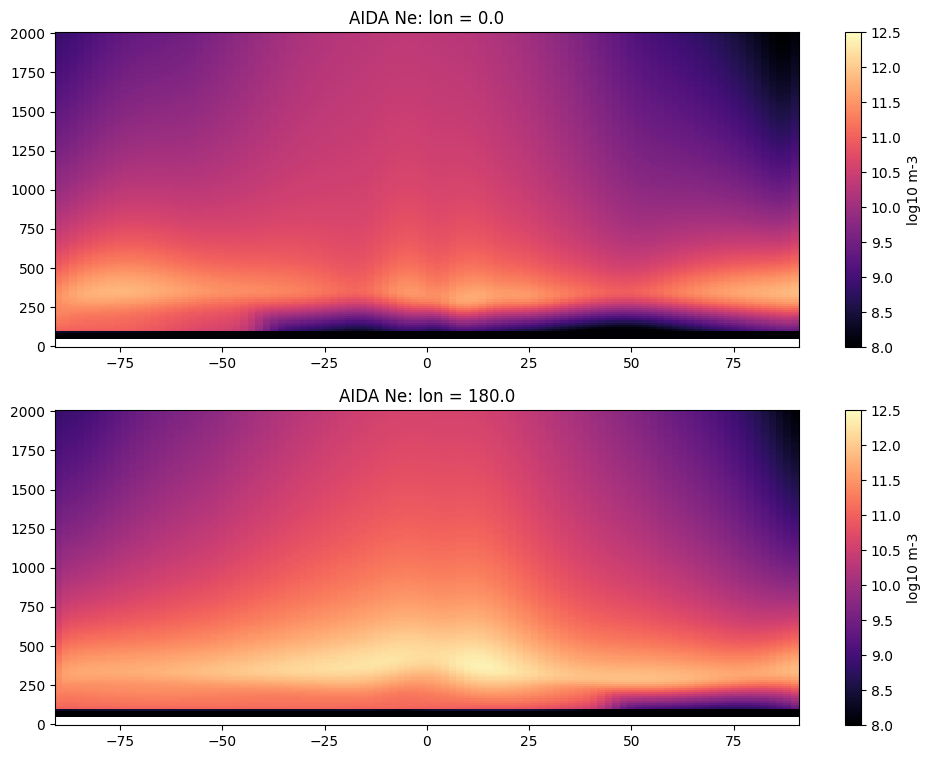

In [11]:
# create figure
fig, axs = plt.subplots(len(glon), 1, squeeze=False)
fig.set_size_inches(12, 9)

for i, lon in enumerate(glon):
    # plot latitudinal section for each longitude
    ax = axs[i, 0]
    pcm = ax.pcolor(Output.glat, Output.alt, np.log10(Output.Ne.sel(glon=lon).T))
    ax.set_title(f"AIDA Ne: lon = {lon}")
    fig.colorbar(pcm, ax=ax, label=f"log10 {Output['Ne'].attrs['units']}")
    pcm.set_clim(8, 12.5)
    pcm.set_cmap(colormaps["magma"])

fig.savefig('./tests/data/output_3D.png')


### Example 2: Electron Density (2D Grid)

For irregular grids, the argument `grid=2D` can be used. This requires `glat` and `glon` to be the same size.


In [12]:
# create irregular grid
glat = [[45.0, 65.0, 77.0], [30.0, 40.0, 50.0]]
glon = [[0.0, 345.0, -160.0], [-60.0, 61.1, 62.2]]
alt = np.linspace(90.0, 500.0, 150)

Output = Model.calc(
    lat=glat, lon=glon, alt=alt, grid="2D", collapse_particles=True, as_dict=True
)


In this example, the output is in `dict` format.


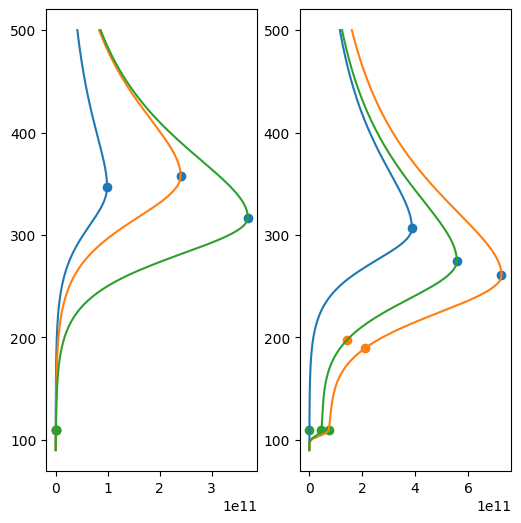

In [13]:
# create figure
fig, axs = plt.subplots(1, 2, squeeze=False)
fig.set_size_inches(6, 6)

for i, lon in enumerate(glon):
    # plot profiles and mark layers
    ax = axs[0, i]
    ax.plot(Output["Ne"][i, :].T, Output["alt"])
    ax.scatter(Output["NmF2"][i, :], Output["hmF2"][i, :])
    ax.scatter(Output["NmF1"][i, :], Output["hmF1"][i, :])
    ax.scatter(Output["NmE"][i, :], Output["hmE"][i, :])

fig.savefig('./tests/data/output_2D.png')


### Example 3: Maps

AIDA uses a parameterized ionospheric profile, and many of these profile parameters are of interest, in addition to the electron density. `AIDAState.calc()` will generate these values along with the electron density. If the `alt` argument is omitted, electron density `Ne` will not be calculated. 

AIDA can also calculate derived quantities, such as the Total Electron Content (TEC) and MUF3000. These are more computationally expensive, and are disabled by default. They can be included by passing the arguments `TEC=True` and `MUF3000=True` to `AIDAState.calc()`.


In [14]:
glat = np.linspace(-90.0, 90)
glon = np.linspace(-180.0, 180.0, 70)

Output = Model.calc(
    lat=glat, lon=glon, grid="3D", TEC=True, MUF3000=True, collapse_particles=True
)


In this example, the AIDA model will be compared to the values given in the background model.


In [15]:
BkgModel = Model.background()
BkgOutput = BkgModel.calc(
    lat=glat, lon=glon, grid="3D", TEC=True, MUF3000=True, collapse_particles=True
)

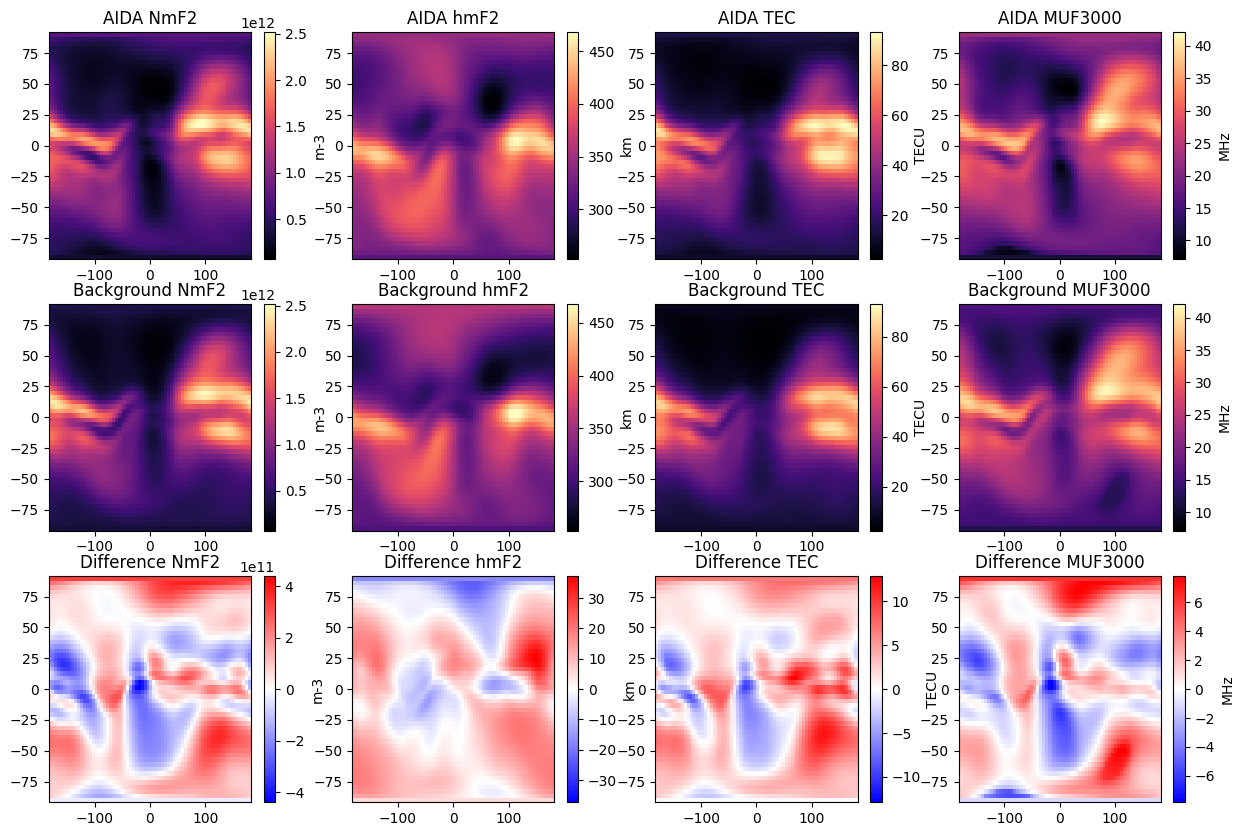

In [16]:

fig, axs = plt.subplots(3, 4, squeeze=False)
fig.set_size_inches(15, 10)

for i, d in enumerate(['NmF2', 'hmF2', 'TEC', 'MUF3000']):
    
    ax = axs[0,i]
    pcm = ax.pcolor(Output.glon, Output.glat, Output[d].T)
    ax.set_title(f"AIDA {d}")
    fig.colorbar(pcm, ax=ax, label=Output[d].attrs['units'])
    pcm.set_cmap(colormaps['magma'])
    cl = pcm.get_clim()

    ax = axs[1, i]
    pcm = ax.pcolor(BkgOutput.glon, BkgOutput.glat, BkgOutput[d].T)
    ax.set_title(f"Background {d}")
    fig.colorbar(pcm, ax=ax, label=Output[d].attrs['units'])
    pcm.set_cmap(colormaps['magma'])
    pcm.set_clim(cl)

    ax = axs[2, i]
    pcm = ax.pcolor(
        BkgOutput.glon, BkgOutput.glat, (Output[d] - BkgOutput[d]).T
    )
    ax.set_title(f"Difference {d}")
    fig.colorbar(pcm, ax=ax, label=Output[d].attrs['units'])
    cl = np.max(np.abs(pcm.get_clim()))
    pcm.set_clim(-cl, cl)
    pcm.set_cmap(colormaps['bwr'])

fig.savefig('./tests/data/output_Map.png')


### Example 4: Electron Density (Advanced Usage)

For some performance-critical applications, it is desireable to calculate only the electron density without additional overhead. This can be achieved with the `AIDAState.calcNe()` method. Like `AIDAState.calc()`, it accepts `glat`, `glon`, `alt`, and `grid`, but outputs only the electron density `Ne` as a `numpy` array. `AIDAState.calcNe()` is often 2 to 5 times faster than calling `AIDAState.calc()` for grid points with 1e3 to 1e4 unique lat/lon pairs.

**CAUTION: `AIDAState.calcNe()` produces output in units of 1e11 m-3, not in unites of m-3! You must multiply the output by 1e11 to get the true electron density.**

Use of `AIDAState.calcNe()` is not recommended unless required, such as when calculating sample points for sTEC calculations. 


In [17]:

def cartsph(x, y, z):
    # convert from ECEF to GEO
    rad = np.sqrt(x**2 + y**2 + z**2)
    lat = np.arctan2(z, np.sqrt(x**2 + y**2))
    lon = np.arctan2(y, x)

    return rad, lat, lon

def sphcart(rad, lat, lon):
    # convert from GEO to ECEF
    x = rad * np.cos(lat) * np.cos(lon)
    y = rad * np.cos(lat) * np.sin(lon)
    z = rad * np.sin(lat)

    return x, y, z


In this example slant Total Electron Content will be calculated between two points.


In [18]:

# Earth's Radius
Re = 6371e3

# receiver and satellite coordinates (ECEF)
rX, rY, rZ = sphcart(Re, np.deg2rad(45.0), np.deg2rad(0.0))
tX, tY, tZ = sphcart(Re+22000e3, np.deg2rad(-30.0), np.deg2rad(10.0))

# create linear sample points
t = np.linspace(0,1,1000)
x = rX + (tX-rX) * t
y = rY + (tY-rY) * t
z = rZ + (tZ-rZ) * t

# find geo coordinates of sample points
rad, glat_r, glon_r = cartsph(x, y, z)
alt = (rad - Re) * 1e-3
glat = np.rad2deg(glat_r)
glon = np.rad2deg(glon_r)


The electron density can be calculated with:


In [19]:

# output is in 1e11 m-3!
Ne = Model.calcNe(lat=glat, lon=glon, alt=alt, grid="1D")

In [22]:

# linear distance (m)
d = np.sqrt((x - rX) ** 2 + (y - rY) ** 2 + (z - rZ) ** 2)

# integrate along ray
sTEC = np.trapz(Ne*1e11, d) # array([3.33699994e+17])

print(sTEC)

[3.33699994e+17]


The difference in performance between `AIDAState.calc()` and `AIDAState.calcNe()` can be shown:

In [27]:
import time

# time calcNe
t_start = time.perf_counter()
Output = Model.calcNe(
    lat=glat, lon=glon, alt=alt, grid="1D"
)
t_stop = time.perf_counter()
t_calcNe = t_stop - t_start
print(f"calcNe in {t_calcNe:.5f}")

# time calc
t_start = time.perf_counter()
Output = Model.calc(
    lat=glat, lon=glon, alt=alt, grid="1D"
)
t_stop = time.perf_counter()
t_calc = t_stop - t_start
print(f"calc in {t_calc:.5f}")

# time calc with TEC and MUF
t_start = time.perf_counter()
Output = Model.calc(
    lat=glat, lon=glon, alt=alt, grid="1D", TEC=True, MUF3000=True
)
t_stop = time.perf_counter()
t_TEC = t_stop - t_start
print(f"calc (with TEC) in {t_TEC:.5f}")



calcNe in 0.00693
calc in 0.03310
calc (with TEC) in 0.10457
